In [5]:
# Importação de bibliotecas necessárias

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder, StandardScaler

from sklearn.decomposition import PCA

from sklearn.cluster import KMeans

In [6]:
# Carregar os dados da planilha Excel

df = pd.read_excel("Pesquisa_RPA.xlsx", engine="openpyxl")


# Remover linhas onde o porte da empresa é 'Pequeno Porte'

df = df[df["Qual o porte da empresa em que trabalha?"] != "Pequeno Porte"]


# Remover coluna de data se existir

if "Carimbo de data/hora" in df.columns:
    df = df.drop(columns=["Carimbo de data/hora"])

In [7]:
# Identificar colunas categóricas

cat_cols = df.select_dtypes(include=["object"]).columns.tolist()


# Codificar variáveis categóricas com OrdinalEncoder

encoder = OrdinalEncoder()

df_encoded = df.copy()

df_encoded[cat_cols] = encoder.fit_transform(df_encoded[cat_cols])


# Padronizar os dados com StandardScaler

scaler = StandardScaler()

scaled_data = scaler.fit_transform(df_encoded)

In [8]:
# Aplicar PCA para reduzir os dados a 2 componentes principais

pca = PCA(n_components=2)

pca_data = pca.fit_transform(scaled_data)

In [9]:
# Aplicar o método do cotovelo para k de 1 a 10
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(pca_data)
    inertia.append(kmeans.inertia_)

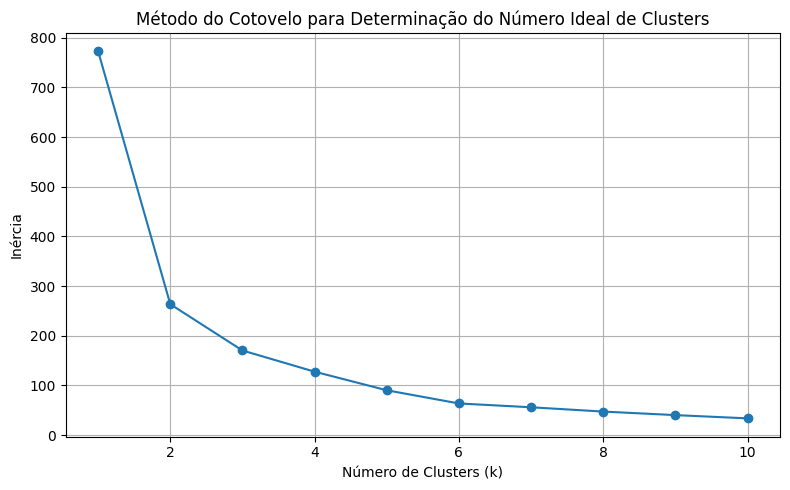

In [10]:
# Plotar o gráfico do método do cotovelo
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Método do Cotovelo para Determinação do Número Ideal de Clusters')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inércia')
plt.grid(True)
plt.tight_layout()
plt.show()

In [11]:
# Suponha que o número ideal de clusters seja 3 (troque conforme análise do gráfico)
k_optimal = 3
kmeans = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
clusters = kmeans.fit_predict(pca_data)

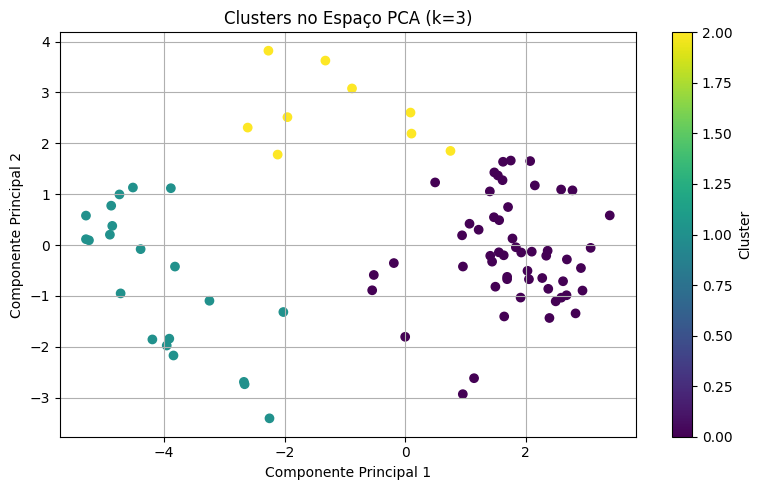

In [12]:
# Plotar os clusters no espaço PCA
plt.figure(figsize=(8, 5))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=clusters, cmap='viridis')
plt.title(f'Clusters no Espaço PCA (k={k_optimal})')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()

In [13]:
# Aplicar KMeans para identificar clusters nos dados

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)

clusters = kmeans.fit_predict(pca_data)

In [14]:
# Função auxiliar para gerar gráficos de barras agrupados por cluster

def plot_por_cluster(df, coluna, clusters, titulo):
    df_temp = df.copy()
    df_temp["Cluster"] = clusters
    agrupado = df_temp.groupby(["Cluster", coluna]).size().unstack().fillna(0)
    agrupado.plot(kind="bar", stacked=True, figsize=(10,6))
    plt.title(titulo)
    plt.xlabel("Cluster")
    plt.ylabel("Contagem")
    plt.legend(title=coluna, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

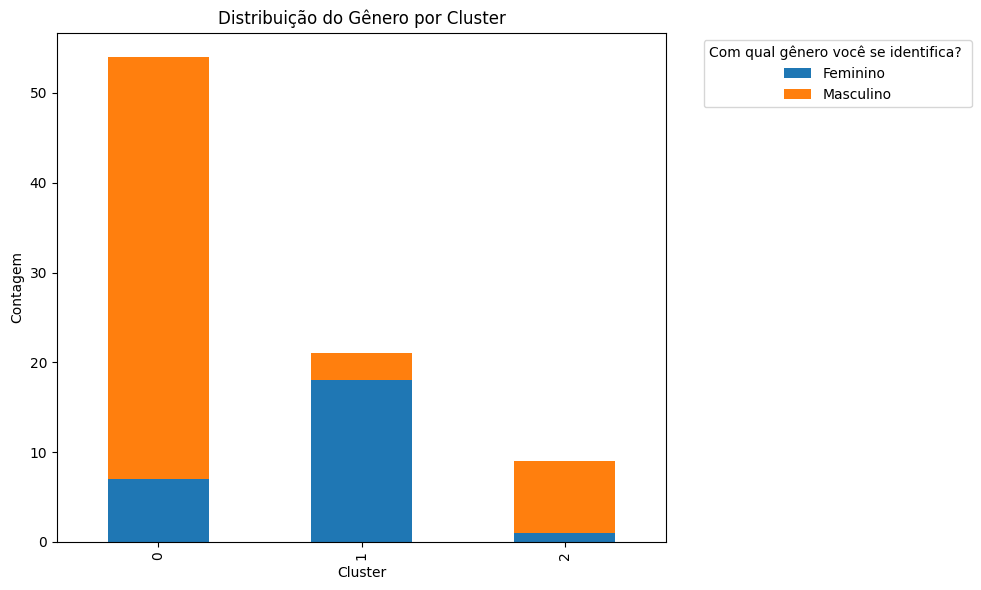

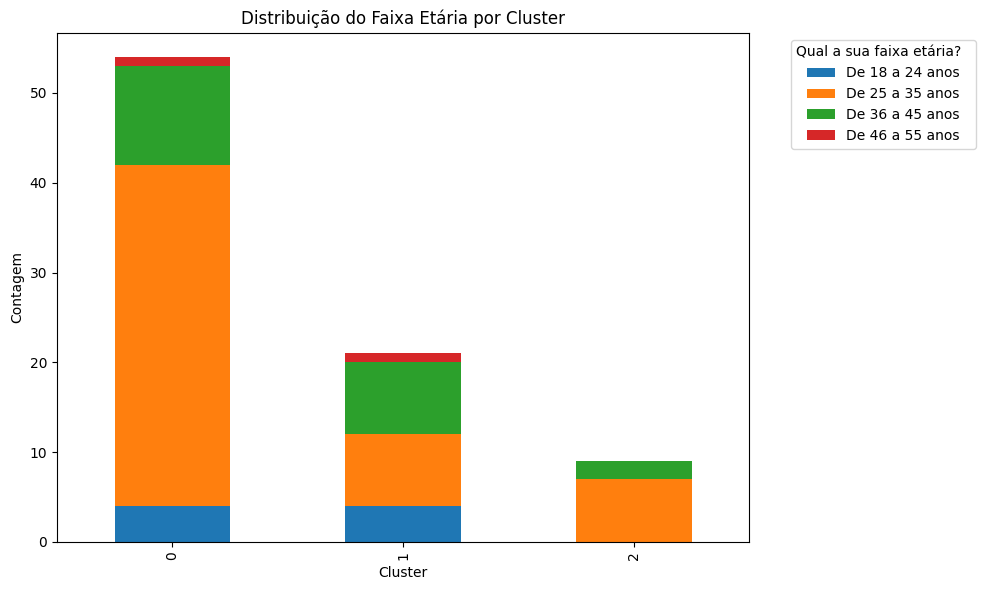

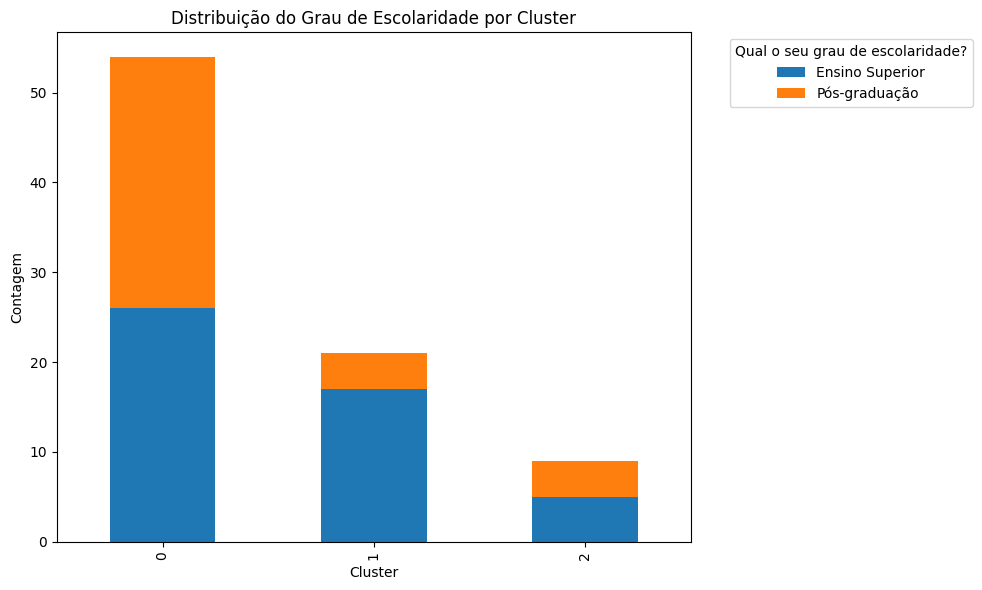

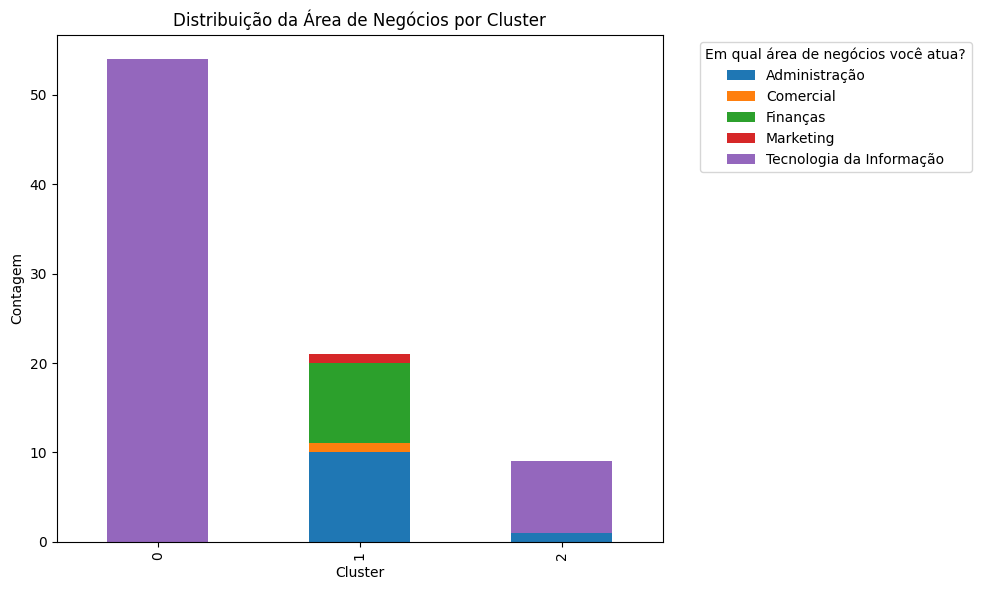

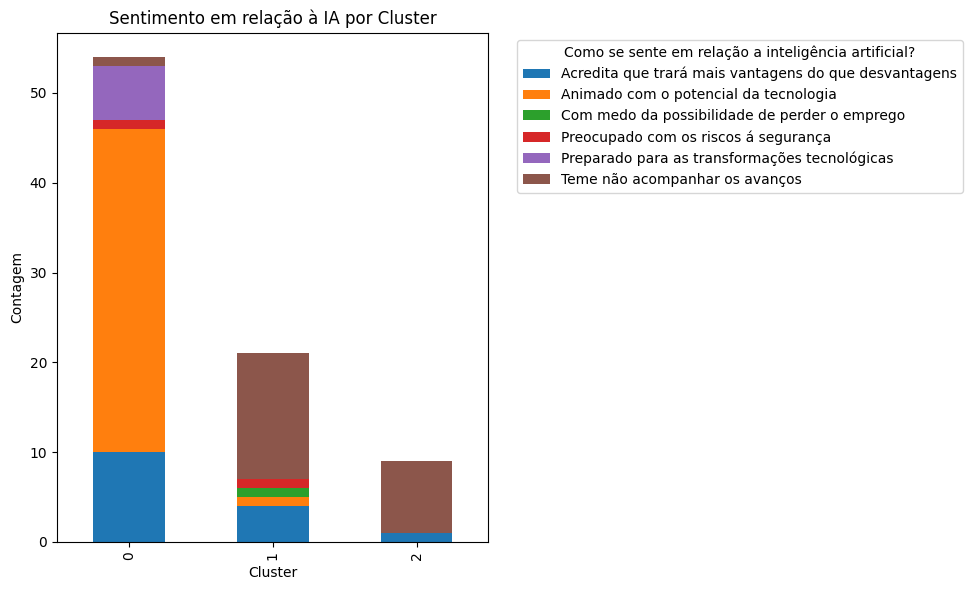

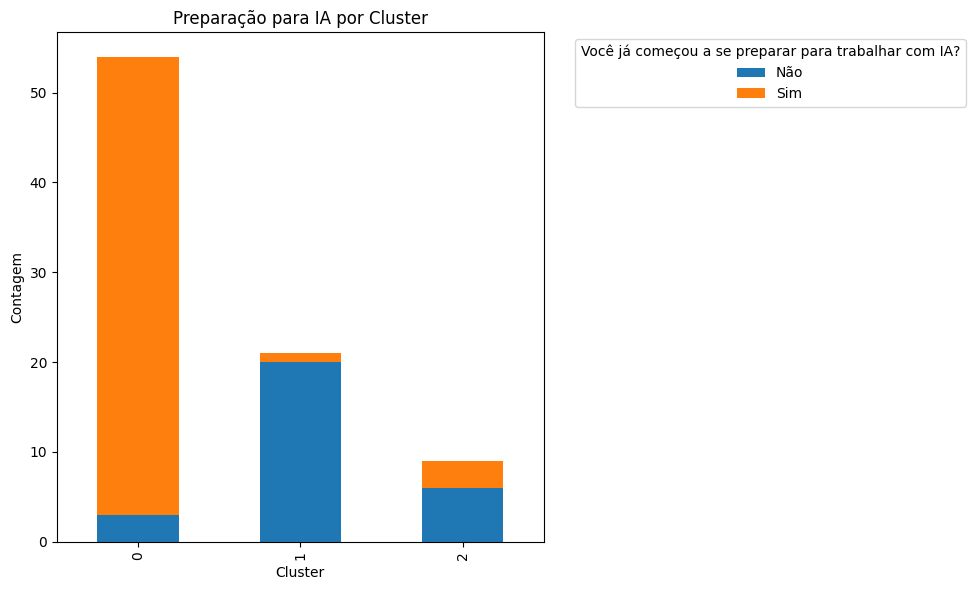

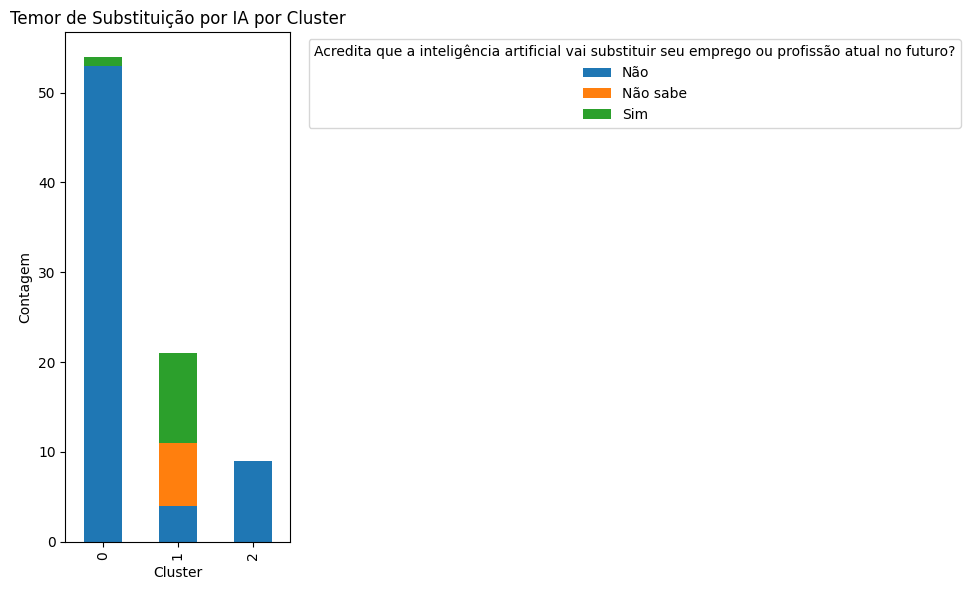

/tmp/ipython-input-2936732085.py:12: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


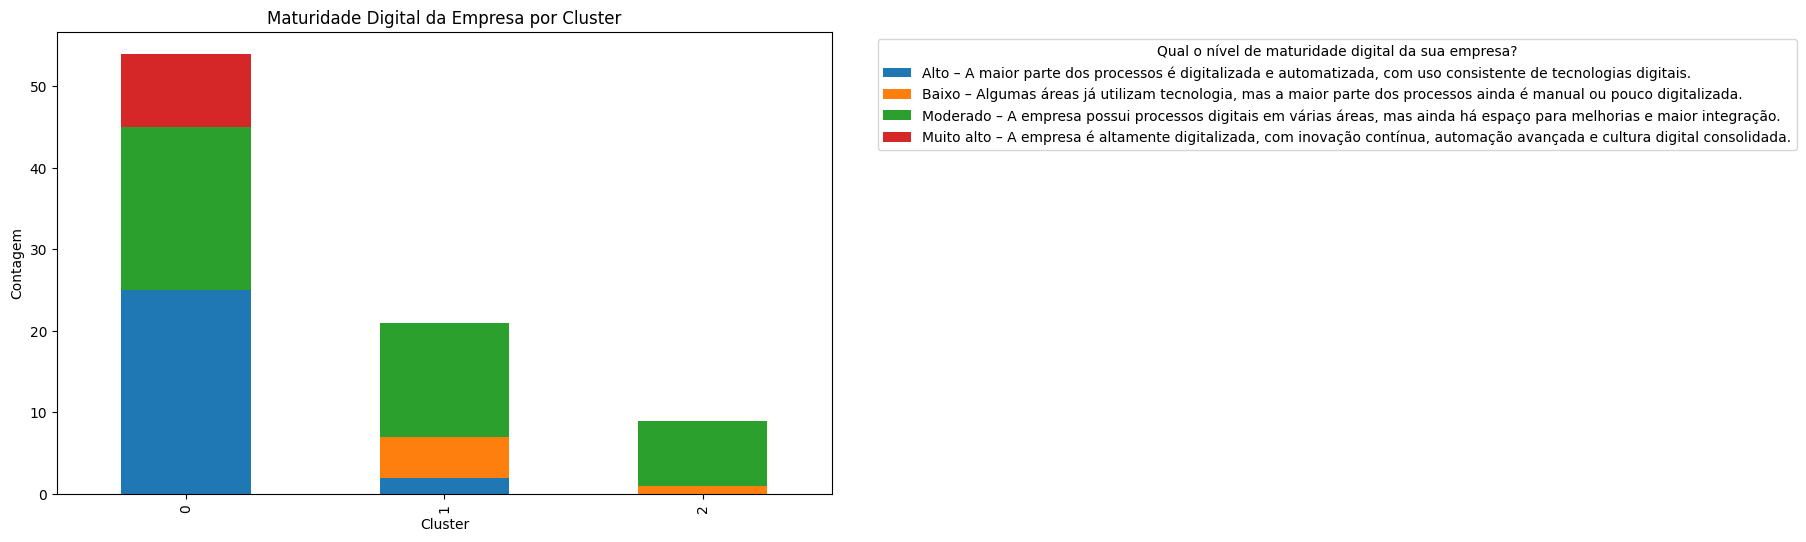

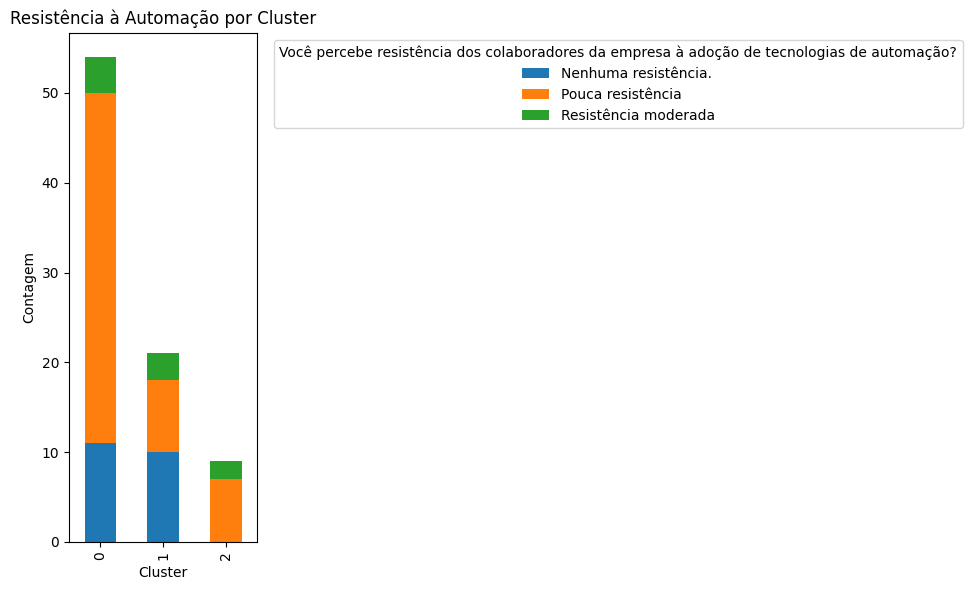

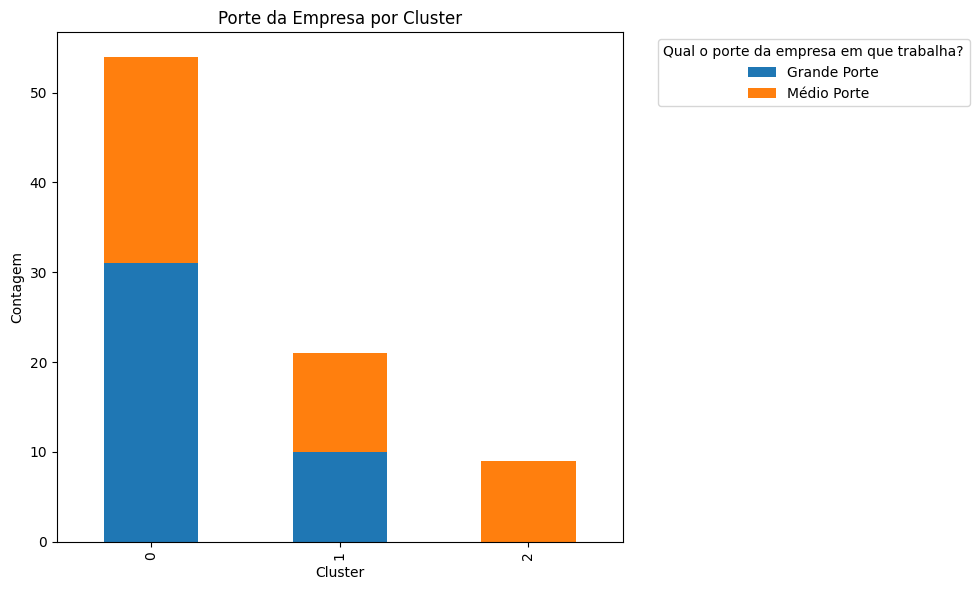

In [21]:
# Gerar gráficos para diferentes variáveis categóricas

plot_por_cluster(df, "Com qual gênero você se identifica? ", clusters, "Distribuição do Gênero por Cluster")

plot_por_cluster(df, "Qual a sua faixa etária?  ", clusters, "Distribuição do Faixa Etária por Cluster")

plot_por_cluster(df, "Qual o seu grau de escolaridade?", clusters, "Distribuição do Grau de Escolaridade por Cluster")

plot_por_cluster(df, "Em qual área de negócios você atua?", clusters, "Distribuição da Área de Negócios por Cluster")

plot_por_cluster(df, "Como se sente em relação a inteligência artificial?", clusters, "Sentimento em relação à IA por Cluster")

plot_por_cluster(df, "Você já começou a se preparar para trabalhar com IA?", clusters, "Preparação para IA por Cluster")

plot_por_cluster(df, "Acredita que a inteligência artificial vai substituir seu emprego ou profissão atual no futuro?", clusters, "Temor de Substituição por IA por Cluster")

plot_por_cluster(df, "Qual o nível de maturidade digital da sua empresa?", clusters, "Maturidade Digital da Empresa por Cluster")

plot_por_cluster(df, "Você percebe resistência dos colaboradores da empresa à adoção de tecnologias de automação?", clusters, "Resistência à Automação por Cluster")

plot_por_cluster(df, "Qual o porte da empresa em que trabalha?", clusters, "Porte da Empresa por Cluster")

In [16]:
# Contar o número de respostas em cada cluster
cluster_counts = pd.Series(clusters).value_counts().sort_index()

print("Número de respostas por cluster:")
print(cluster_counts)

Número de respostas por cluster:
0    54
1    21
2     9
Name: count, dtype: int64


In [19]:
# Filtrar o DataFrame para o Cluster 1 e gênero feminino
df_cluster1_feminino = df[(clusters == 1) & (df["Com qual gênero você se identifica? "] == "Feminino")]

# Contar a distribuição da área de negócios nesse subconjunto
area_negocios_cluster1_feminino = df_cluster1_feminino["Em qual área de negócios você atua?"].value_counts()

print("Distribuição da área de negócios para respondentes do gênero feminino no Cluster 1:")
print(area_negocios_cluster1_feminino)

Distribuição da área de negócios para respondentes do gênero feminino no Cluster 1:
Em qual área de negócios você atua?
Administração    8
Finanças         8
Marketing        1
Comercial        1
Name: count, dtype: int64


In [17]:
print(df.columns)

Index(['Com qual gênero você se identifica? ', 'Qual a sua faixa etária?  ',
       'Qual o seu grau de escolaridade?',
       'Qual o porte da empresa em que trabalha?',
       'Em qual área de negócios você atua?',
       'A Automação Robótica de Processos, conhecida como RPA, é uma tecnologia inovadora que utiliza "robôs" de software para automatizar tarefas repetitivas e baseadas em regras dentro dos processos de negócios. Esses "robôs", também chamados de bots ou "digital workers", são capazes de imitar as ações humanas em sistemas e softwares digitais, tornando as operações mais rápidas e eficientes.\nA RPA funciona através de softwares que são programados para realizar tarefas específicas, como por exemplo copiar e colar dados, extrair informações de websites, abrir, mover e organizar arquivos, entre outras. Essa tecnologia ajuda as empresas a economizar tempo, reduzir erros e liberar os colaboradores para se concentrarem em atividades mais estratégicas e criativas.\nAtua ou já 